# ¡Hola Emanuel! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


-----

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Emanuel completaste todas las tareas propuestas para el proyecto de manera sobresaliente. Demostraste un excelente manejo de las herramientas de visualización de datos y un notable dominio en la prueba de hipótesis, lo cual fortalece el análisis de los datos con los que has trabajado. Continúa desarrollando estas habilidades, ya que serán claves en futuros proyectos.

Éxitos en tu próximo sprint 🚀

*Estado del Proyecto:* **Aprobado**

</div>

-------

# *Análisis exploratiorio de datos (Python)*

In [1]:
# Importamos las librerías necesarias
import pandas as pd
from matplotlib import pyplot as plt 
from scipy.stats import ttest_ind, levene 

In [2]:
# Cargamos los datasets
sql_result_01 = pd.read_csv('moved_project_sql_result_01.csv')
sql_result_04 = pd.read_csv('moved_project_sql_result_04.csv')
sql_result_07 = pd.read_csv('moved_project_sql_result_07.csv')

### Exploramos la información de los datasets 

In [3]:
# Exploramos la información de los datasets
print(" ==Dataset 01== ")
print(sql_result_01.info())
print("\n ==Dataset 04== ")
print(sql_result_04.info())

 ==Dataset 01== 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

 ==Dataset 04== 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [4]:
print(" ==Dataset 07== ")
print(sql_result_07.info()) # Exploramos la información del DataFrame

 ==Dataset 07== 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente la función `info`, esto te permite hacer una primera revisión de los datos, su estructura y contenido.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

También te recomiendo usar la función `head`, para complementar la revisión inicial de los datos con los que vas a trabajar.  

</div>
</div>

## Asignación correcta de los tipos de datos 

In [5]:
# Convertimos la columna de start_ts a tipo datetime
sql_result_07['start_ts'] = pd.to_datetime(sql_result_07['start_ts'], format='%Y-%m-%d %H:%M:%S')

# Convertimos la columna de weather_conditions a tipo category
sql_result_07['weather_conditions'] = sql_result_07['weather_conditions'].astype('category')

# Convertimos la columna duration_seconds a tipo int64 
sql_result_07['duration_seconds'] = sql_result_07['duration_seconds'].astype('int64')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo realizando la transformación de tipos de datos según su naturaleza

</div>

## Los 10 principales barrios en términos de finalización del recorrido

In [6]:
top_10 = sql_result_04.sort_values(by='average_trips', ascending=False).head(10)
top_10

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


**Gracias a la tabla que está ordenada de mayor a menor, podemos observar que la ubicación con el mayor promedio de viajes finalizados es Loop, con 10,727 viajes promedio. Tal vez esto se deba a que es una zona turística, más atractiva para el público, o simplemente una zona común donde la gente suele terminar sus viajes.**

**Después tenemos en segundo lugar a River North, con 9,523 viajes promedio. En este caso, la diferencia con el primer lugar no es tan grande, lo que sugiere que también puede tratarse de una zona popular o con gran movimiento, ya sea por comercio, vida nocturna o atractivo turístico.**

**Por otro lado, las ubicaciones con menos viajes promedio son Gold Coast, con 1,364, y Sheffield & DePaul, con 1,259. Podemos suponer que estas zonas son menos concurridas, más alejadas o simplemente menos atractivas para finalizar un viaje en taxi. Tal vez no tienen tanta actividad económica o turística como las primeras.**

**En resumen, parece que el número promedio de viajes depende mucho del nivel de actividad y atractivo de cada zona, siendo más alto en áreas populares y más bajo en barrios periféricos o residenciales.**

## Gráfico para el número de viajes para cada compañia

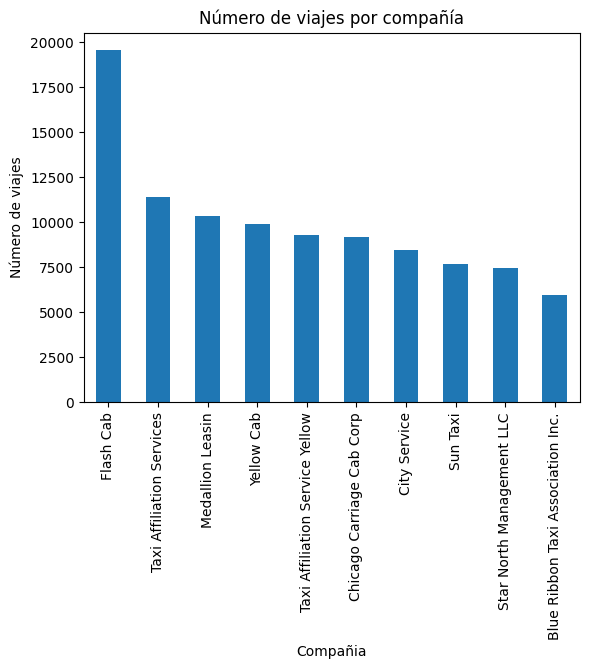

In [7]:
# Grafico para el número de viajes para cada compañia
company_top10 = sql_result_01.sort_values(by='trips_amount', ascending=False).head(10)

company_top10.plot(kind='bar', 
                   x='company_name',
                   y='trips_amount',
                   title='Número de viajes por compañía',
                   xlabel='Compañia',
                   ylabel='Número de viajes')
plt.legend().remove()
plt.show()

**Este estudio se basa en los datos del 15 y 16 de noviembre de 2017.**

**Gracias al gráfico sobre el número de viajes por compañía, observamos que la empresa con más viajes realizados es Flash Cab. Esto podría deberse a que es una compañía muy conocida, que ofrece un buen servicio o tiene un alto nivel de confianza por parte de los clientes.**

**También vemos que la empresa que le sigue es Taxi Affiliation Services, la cual tiene un poco más de la mitad de los viajes realizados en comparación con Flash Cab. Esto podría deberse a que es menos conocida o sus servicios no son tan competitivos.**

**Por último, la compañía con menor número de viajes realizados es Blue Ribbon Taxi Association Inc., con menos de la mitad de viajes en comparación con Flash Cab.**

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy buen trabajo con la gráfica! Se ve claramente que Flash Cab lidera en volumen de viajes, lo que sugiere una fuerte concentración del mercado. Esto puede estar relacionado con su cobertura, cantidad de vehículos o buenas estrategias comerciales.

</div>

## Gráfico para los 10 barrios principales por numero de finalizaciones

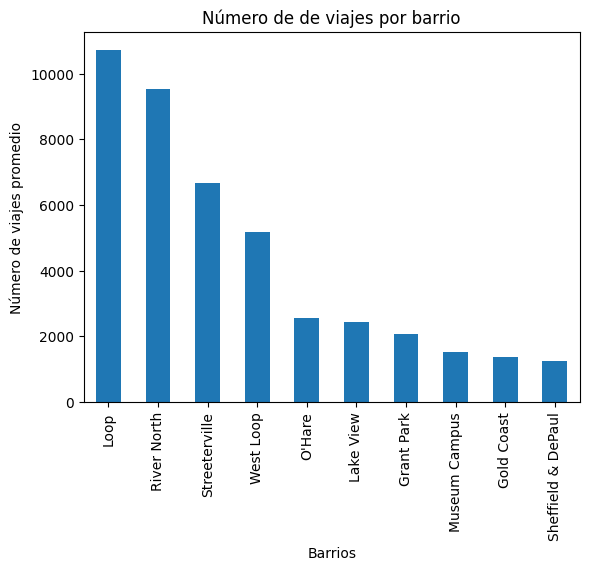

In [8]:
location_top10 = sql_result_04.sort_values(by='average_trips', ascending=False).head(10)

location_top10.plot(kind='bar',
                    x='dropoff_location_name',
                    y='average_trips',
                    title='Número de de viajes por barrio',
                    xlabel='Barrios',
                    ylabel='Número de viajes promedio')
plt.legend().remove()
plt.show() 

**Este estudio se basa en los datos de noviembre de 2017.**

**Gracias al gráfico sobre el número de finalizaciones por barrio, observamos que las ubicaciones con más de 8,000 viajes promedio son Loop y River North. Esto podría deberse a que son destinos muy atractivos para los clientes o turistas, ya sea por su ubicación, popularidad o la oferta de servicios.**

**El barrio que ocupa el primer lugar es Loop, lo que indica que es el destino más común para finalizar los viajes. Esto podría estar relacionado con su relevancia económica o turística dentro de la ciudad.**

**Por otro lado, la localización con menor número de viajes finalizados es Sheffield & DePaul. Esto podría deberse a que es un destino menos concurrido o no tan atractivo para los clientes, ya sea por estar más alejado o por no contar con tantos puntos de interés.**

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Buen trabajo obteniendo el Top de barrios! Lograste identificar y jerarquizar bien los de mayor actividad, destacando la diferencia notable con barrios como Loop y River North, que seguramente destacan por su relevancia comercial y turística.

</div>

## Prueba de hípotesis

**Establecemos como hipótesis alternativa que la duración promedio de los viajes cambia cuando los sábados son lluviosos, y como hipótesis nula que la duración promedio de los viajes no cambia cuando los sábados son lluviosos.
Por lo tanto, nuestra tarea es comprobar, a través de una prueba de hipótesis, si la duración promedio de los viajes cambia si los sábados son lluviosos o no.**

**Establecí el nivel de significación como 0.05, ya que este, al estar equilibrado, nos permite tener confianza en los resultados sin ser demasiado estrictos ni demasiado laxos.**

**Además, para verificar si podemos asumir varianzas iguales entre ambos grupos (clima "Good" y "Bad"), primero usamos la prueba de Levene. Esta prueba nos ayuda a decidir si podemos aplicar una prueba t para varianzas iguales o desiguales.**

In [9]:
# Filtramos los datos por condiciones climáticas
Bad = sql_result_07[sql_result_07['weather_conditions'] == 'Bad']['duration_seconds']
Good = sql_result_07[sql_result_07['weather_conditions'] == 'Good']['duration_seconds']

# Definimos el nivel de significancia
alpha = 0.05

# Realizamos la prueba de levene para comprobar si las varianzas son iguales
levene_stat, levene_p = levene(Bad, Good)

if levene_p < alpha:
    print('Rechazamos la hípotesis nula de Levene, las varianzas no son iguales\n')
    equal_var = False
else:
    print('No rechazamos la hípotesis nula de Levene, las varianzas son iguales\n')
    equal_var = True

 # Realizamos la prueba t test   
result = ttest_ind(Bad, Good, equal_var=equal_var) 
print(f'Prueba t - valor_P:', result.pvalue, '\n')

if result.pvalue < alpha:
    print('Rechazamos la hípotesis nula, los sábados lluviosos sí cambian la duración de los viajes.')
else:
    print('No rechazamos la hípotesis nula, los sábados lluviosos no cambian la duración de los viajes.')

No rechazamos la hípotesis nula de Levene, las varianzas son iguales

Prueba t - valor_P: 6.517970327099473e-12 

Rechazamos la hípotesis nula, los sábados lluviosos sí cambian la duración de los viajes.


**La hípotesis nula planteaba que los sábados lluviosos no cambian la duración promedio de los viajes. Sin embargo, al realizar la prueba de hípotesis y al obtener evidencia suficiente, la rechazamos.**  

**Esto nos lleva a suponer que, efectivamente, los sábados lluviosos si afectan la duración promedio de los viajes. Esto puede deberse a que, durante días lluviosos, muchas personas prefieren quedarse en lugares cerrados y resguardados, lo cual reduce el número total de viajes. Además, los viajes que sí se realizan tienden a durar más tiempo, ya que los taxistas suelen conducir con mayor precaución para evitar accidentes debido a las condiciones climáticas.**

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Excelente Emanuel! Aplicaste correctamente la prueba de hipótesis comparando la distribución de muestras independientes comprobando que el clima sí afecta la duración de los viajes en Taxi. Además incluiste la prueba de Levene, lo cual es clave para verificar la similitud de las varianzas y garantizar que la prueba t sea estadísticamente válida. 

</div>